In [1]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#task1-2
Q = 0.95
alpha = 1 - Q
n = 10000
rng = np.random.default_rng(42)
n_list = [20, 50, 100, 250, 500, 1000]
N_trials = 1000


def intervals(X, name):
    x_bar = X.mean()
    s = X.std(ddof=1)

    # Асимптотический
    z = stats.norm.ppf(1 - alpha/2)
    ci_norm = (x_bar - z * s/np.sqrt(n), x_bar + z * s/np.sqrt(n))

    # Стьюдент
    t = stats.t.ppf(1 - alpha/2, df=n-1)
    ci_t = (x_bar - t * s/np.sqrt(n), x_bar + t * s/np.sqrt(n))

    # Хора-Хора
    a, b = X.min(), X.max()
    eps = (b - a) * math.sqrt(math.log(2/alpha)/(2*n)-1/(6*n))
    ci_hoeff = (x_bar - eps, x_bar + eps)

    print(f"\n{name}")
    print(f"Среднее={x_bar:.6f}, Дисперсия={X.var():.6f}")
    print(f"Асимптотический: {ci_norm}")
    print(f"Стьюдент:        {ci_t}")
    print(f"Хора-Хора:        {ci_hoeff}")


a, b = -math.sqrt(3), math.sqrt(3)
x_uniform = rng.uniform(a, b, size=n)
intervals(x_uniform, "Равномерное")

x_normal = rng.normal(0, 1, size=n)
intervals(x_normal, "Нормальное распределение N(0,1)")

x_exp = rng.exponential(1, size=n) - 1
intervals(x_exp, "Экспоненциальное Exp(1, c=-1)")


Равномерное
Среднее=-0.009971, Дисперсия=0.996756
Асимптотический: (np.float64(-0.029539879420817265), np.float64(0.009597722402645305))
Стьюдент:        (np.float64(-0.029542248478177078), np.float64(0.009600091460005119))
Хора-Хора:        (np.float64(-0.054826059406013164), np.float64(0.03488390238784121))

Нормальное распределение N(0,1)
Среднее=0.014047, Дисперсия=1.003985
Асимптотический: (np.float64(-0.005593047771812718), np.float64(0.03368622118276135))
Стьюдент:        (np.float64(-0.005595425404495084), np.float64(0.03368859881544372))
Хора-Хора:        (np.float64(-0.09008227190830861), np.float64(0.11817544531925725))

Экспоненциальное Exp(1, c=-1)
Среднее=0.009589, Дисперсия=1.054372
Асимптотический: (np.float64(-0.010537071590341517), np.float64(0.029715786454437187))
Стьюдент:        (np.float64(-0.010539508155822323), np.float64(0.029718223019917993))
Хора-Хора:        (np.float64(-0.12631899663519952), np.float64(0.1454977114992952))


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2020548528.py:14: SyntaxWarning: invalid escape sequence '\s'
  "Uniform[-sqrt3,\sqrt3]": gen_uniform,


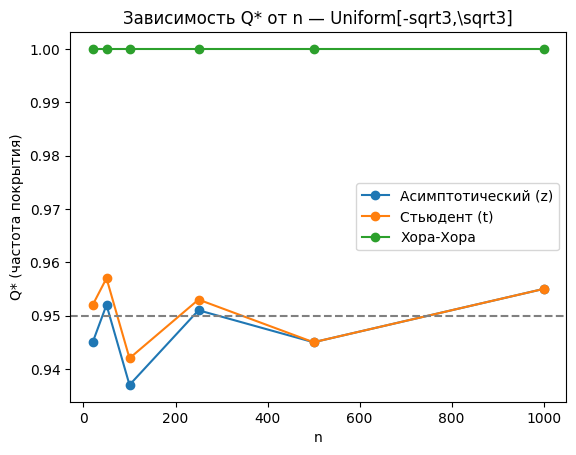

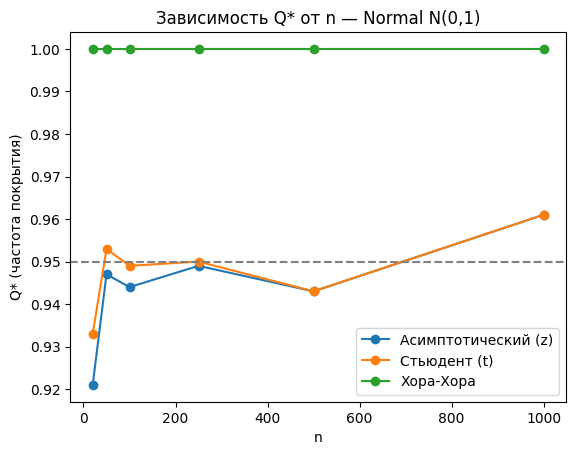

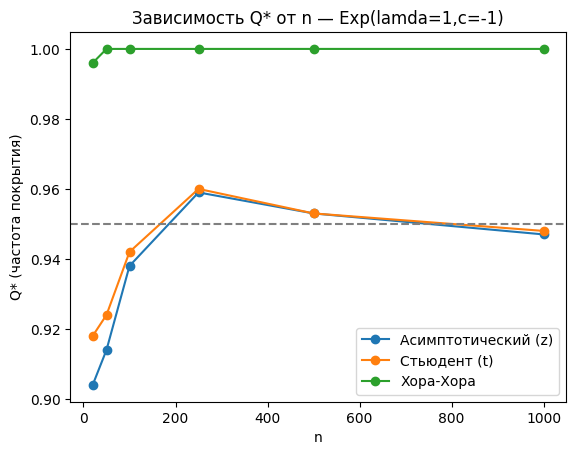

,distribution,n,Q*_asym,Q*_t,Q*_hora-hora
0,"Uniform[-sqrt3,\sqrt3]",20,0.945,0.952,1.000
1,"Uniform[-sqrt3,\sqrt3]",50,0.952,0.957,1.000
2,"Uniform[-sqrt3,\sqrt3]",100,0.937,0.942,1.000
3,"Uniform[-sqrt3,\sqrt3]",250,0.951,0.953,1.000
4,"Uniform[-sqrt3,\sqrt3]",500,0.945,0.945,1.000
5,"Uniform[-sqrt3,\sqrt3]",1000,0.955,0.955,1.000
6,"Normal N(0,1)",20,0.921,0.933,1.000
7,"Normal N(0,1)",50,0.947,0.953,1.000
8,"Normal N(0,1)",100,0.944,0.949,1.000
9,"Normal N(0,1)",250,0.949,0.950,1.000


In [4]:
# tasks 3–4
def gen_uniform(n):
    a, b = -math.sqrt(3), math.sqrt(3)
    return rng.uniform(a, b, size=n), 0.0, (a, b)

def gen_normal(n):
    return rng.normal(0, 1, size=n), 0.0, None

def gen_shifted_exp(n):
    lam, c = 1.0, -1.0
    return rng.exponential(scale=1/lam, size=n) + c, 0.0, (c, None)

distributions = {
    "Uniform[-sqrt3,\sqrt3]": gen_uniform,
    "Normal N(0,1)": gen_normal,
    "Exp(lamda=1,c=-1)": gen_shifted_exp,
}

def ci_asymptotic(x, alpha):
    n = len(x)
    m = x.mean()
    s = x.std(ddof=1)
    z = stats.norm.ppf(1 - alpha/2)
    return m - z*s/np.sqrt(n), m + z*s/np.sqrt(n)

def ci_student(x, alpha):
    n = len(x)
    m = x.mean()
    s = x.std(ddof=1)
    t = stats.t.ppf(1 - alpha/2, df=n-1)
    return m - t*s/np.sqrt(n), m + t*s/np.sqrt(n)

def ci_hora_hora(x, alpha, bounds=None):
    n = len(x)
    m = x.mean()
    if bounds is not None:
        a, b = bounds
        if a is None: a = float(x.min())
        if b is None: b = float(x.max())
    else:
        a, b = float(x.min()), float(x.max())
    width = b - a
    eps = width * math.sqrt(max(0.0, math.log(2/alpha)/(2*n) - 1/(6*n)))
    return m - eps, m + eps

rows = []
for dist_name, gen in distributions.items():
    cover_asym, cover_t, cover_hh = [], [], []
    for n in n_list:
        c_asym = c_t = c_hh = 0
        for _ in range(N_trials):
            x, mu_true, bounds = gen(n)
            L1,U1 = ci_asymptotic(x, alpha)
            L2,U2 = ci_student(x, alpha)
            L3,U3 = ci_hora_hora(x, alpha, bounds)
            c_asym += (L1 <= mu_true <= U1)
            c_t    += (L2 <= mu_true <= U2)
            c_hh   += (L3 <= mu_true <= U3)
        cover_asym.append(c_asym / N_trials)
        cover_t.append(c_t / N_trials)
        cover_hh.append(c_hh / N_trials)
        rows.append({
            "distribution": dist_name,
            "n": n,
            "Q*_asym": c_asym/N_trials,
            "Q*_t": c_t/N_trials,
            "Q*_hora-hora": c_hh/N_trials
        })
    # график для данного распределения
    plt.figure()
    plt.plot(n_list, cover_asym, marker='o', label='Асимптотический (z)')
    plt.plot(n_list, cover_t, marker='o', label='Стьюдент (t)')
    plt.plot(n_list, cover_hh, marker='o', label='Хора-Хора')
    plt.axhline(Q, linestyle='--', color='gray')
    plt.title(f"Зависимость Q* от n — {dist_name}")
    plt.xlabel("n")
    plt.ylabel("Q* (частота покрытия)")
    plt.legend()
    plt.show()

# таблица результатов
df = pd.DataFrame(rows)
df

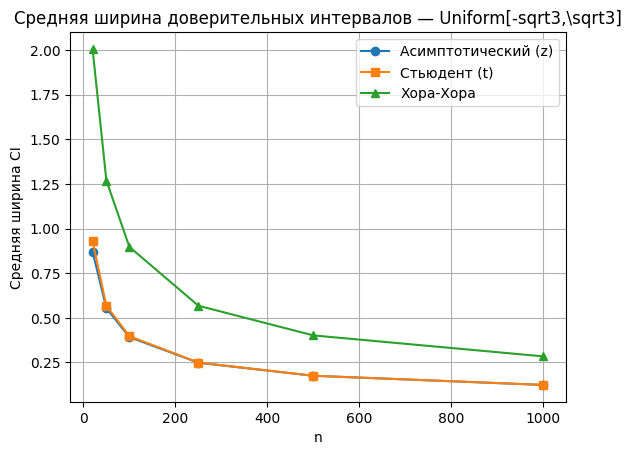

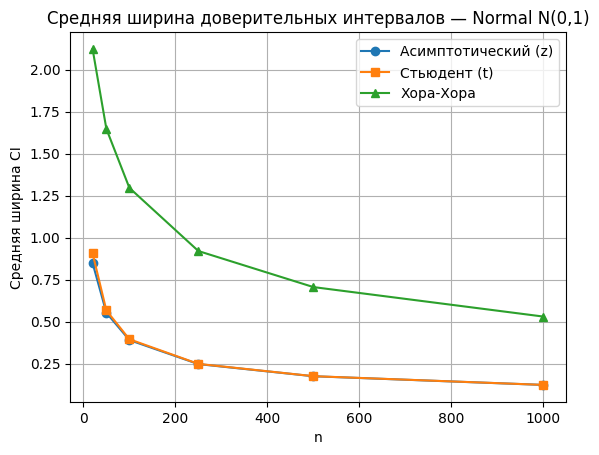

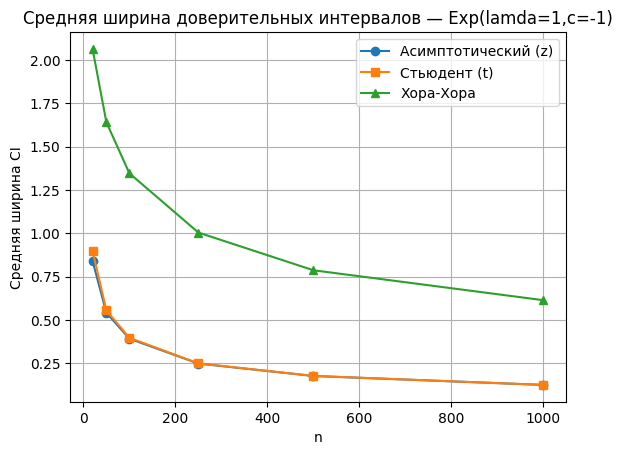

,distribution,n,width_asym,width_t,width_hora-hora
0,"Uniform[-sqrt3,\sqrt3]",20,0.871190,0.930335,2.006653
1,"Uniform[-sqrt3,\sqrt3]",50,0.553674,0.567689,1.269119
2,"Uniform[-sqrt3,\sqrt3]",100,0.392251,0.397105,0.897402
3,"Uniform[-sqrt3,\sqrt3]",250,0.248094,0.249305,0.567567
4,"Uniform[-sqrt3,\sqrt3]",500,0.175166,0.175592,0.401331
5,"Uniform[-sqrt3,\sqrt3]",1000,0.123961,0.124111,0.283784
6,"Normal N(0,1)",20,0.849123,0.906769,2.122673
7,"Normal N(0,1)",50,0.552768,0.566760,1.647144
8,"Normal N(0,1)",100,0.390617,0.395451,1.296026
9,"Normal N(0,1)",250,0.247654,0.248864,0.920223


In [5]:
#task5
widths = []

for dist_name, gen in distributions.items():
    mean_width_asym, mean_width_t, mean_width_hh = [], [], []
    for n in n_list:
        w_asym = w_t = w_hh = 0
        for _ in range(N_trials):
            x, mu_true, bounds = gen(n)
            L1, U1 = ci_asymptotic(x, alpha)
            L2, U2 = ci_student(x, alpha)
            L3, U3 = ci_hora_hora(x, alpha, bounds)
            w_asym += (U1 - L1)
            w_t += (U2 - L2)
            w_hh += (U3 - L3)
        mean_width_asym.append(w_asym / N_trials)
        mean_width_t.append(w_t / N_trials)
        mean_width_hh.append(w_hh / N_trials)
        widths.append({
            "distribution": dist_name,
            "n": n,
            "width_asym": w_asym / N_trials,
            "width_t": w_t / N_trials,
            "width_hora-hora": w_hh / N_trials
        })

    plt.figure()
    plt.plot(n_list, mean_width_asym, marker='o', label='Асимптотический (z)')
    plt.plot(n_list, mean_width_t, marker='s', label='Стьюдент (t)')
    plt.plot(n_list, mean_width_hh, marker='^', label='Хора-Хора')
    plt.title(f"Средняя ширина доверительных интервалов — {dist_name}")
    plt.xlabel("n")
    plt.ylabel("Средняя ширина CI")
    plt.legend()
    plt.grid(True)
    plt.show()

df_widths = pd.DataFrame(widths)
df_widths


Видим, что в среднем у Хора-Хора ширина интервала больше (что в целом и логично). А так с ростом $n$ ширина уменьшается.

Домашнее задание: сделать всё то же самое для Jackknife и Bootstrap

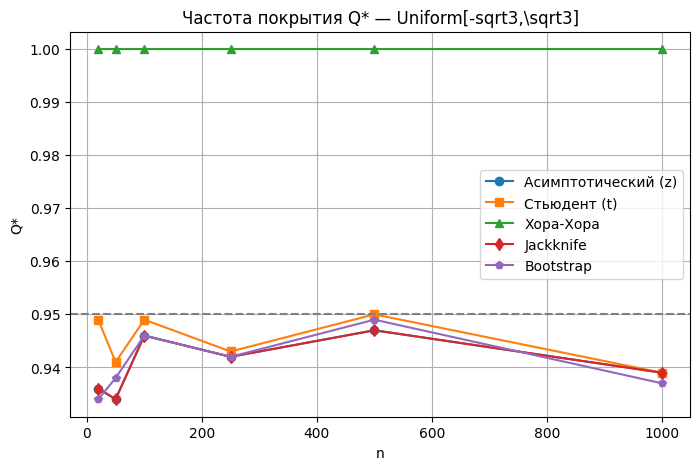

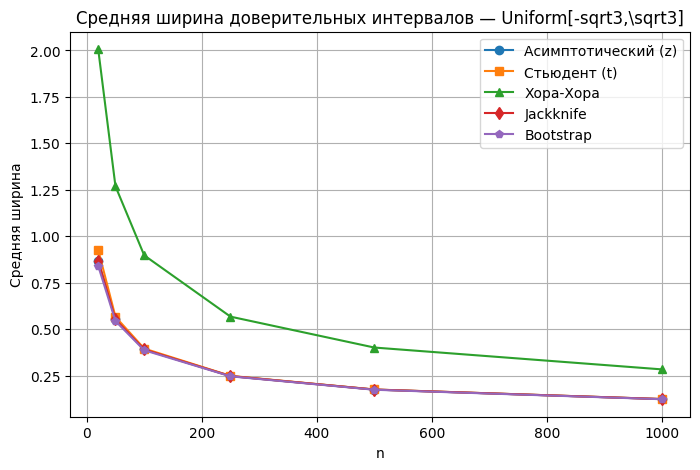

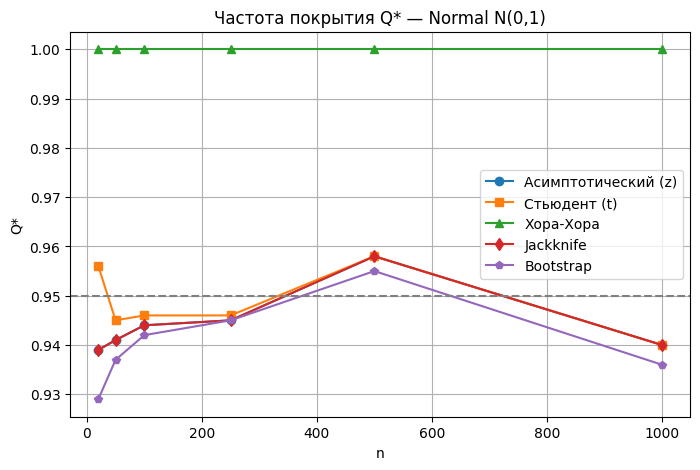

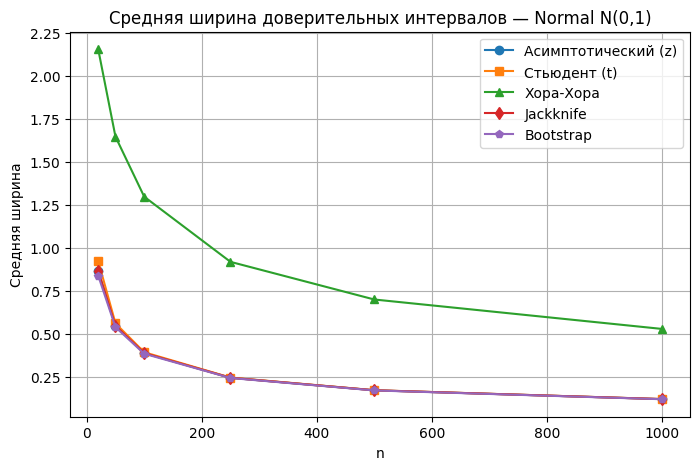

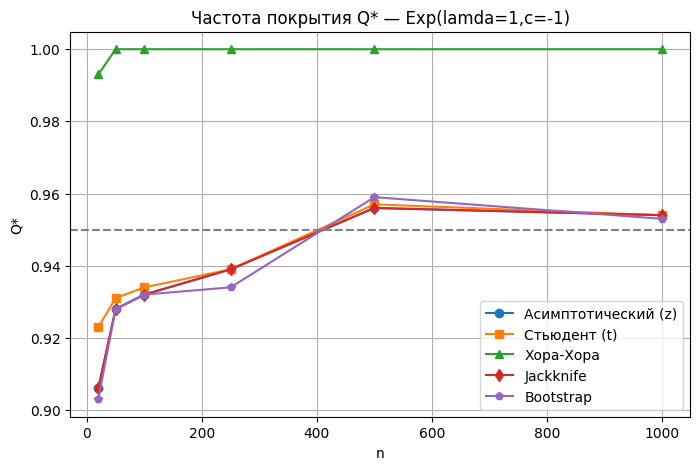

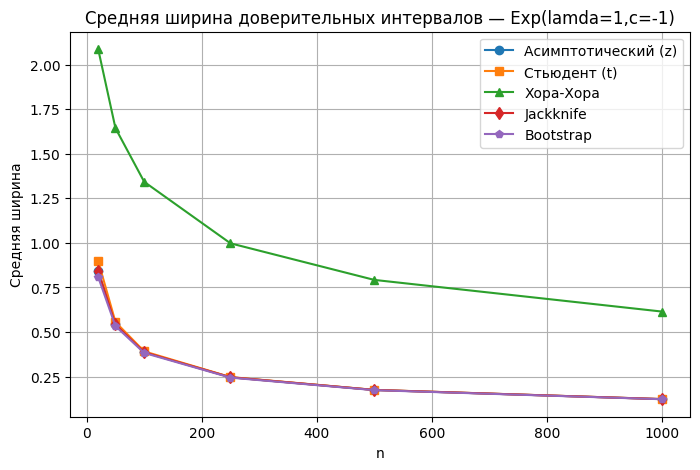

,distribution,n,Q*_z,Q*_t,Q*_hora-hora,Q*_jackknife,Q*_bootstrap,width_z,width_t,width_hora-hora,width_jackknife,width_bootstrap
0,"Uniform[-sqrt3,\sqrt3]",20,0.936,0.949,1.000,0.936,0.934,0.868289,0.927237,2.006653,0.868289,0.840577
1,"Uniform[-sqrt3,\sqrt3]",50,0.934,0.941,1.000,0.934,0.938,0.552612,0.566600,1.269119,0.552612,0.543792
2,"Uniform[-sqrt3,\sqrt3]",100,0.946,0.949,1.000,0.946,0.946,0.390841,0.395677,0.897402,0.390841,0.386683
3,"Uniform[-sqrt3,\sqrt3]",250,0.942,0.943,1.000,0.942,0.942,0.247677,0.248887,0.567567,0.247677,0.246371
4,"Uniform[-sqrt3,\sqrt3]",500,0.947,0.950,1.000,0.947,0.949,0.175221,0.175647,0.401331,0.175221,0.174165
5,"Uniform[-sqrt3,\sqrt3]",1000,0.939,0.939,1.000,0.939,0.937,0.123963,0.124114,0.283784,0.123963,0.123203
6,"Normal N(0,1)",20,0.939,0.956,1.000,0.939,0.929,0.867238,0.926114,2.156164,0.867238,0.841026
7,"Normal N(0,1)",50,0.941,0.945,1.000,0.941,0.937,0.549889,0.563808,1.648358,0.549889,0.541778
8,"Normal N(0,1)",100,0.944,0.946,1.000,0.944,0.942,0.391148,0.395988,1.299497,0.391148,0.387351
9,"Normal N(0,1)",250,0.945,0.946,1.000,0.945,0.945,0.247652,0.248861,0.921047,0.247652,0.246357


In [6]:
def ci_jackknife(x, alpha):
    n = len(x)
    means = np.array([np.mean(np.delete(x, i)) for i in range(n)])
    m = np.mean(means)
    se = np.sqrt((n - 1) * np.mean((means - m) ** 2))
    z = stats.norm.ppf(1 - alpha/2)
    return m - z * se, m + z * se

def ci_bootstrap(x, alpha, B=1000):
    n = len(x)
    boot_means = np.array([np.mean(rng.choice(x, n, replace=True)) for _ in range(B)])
    lower = np.percentile(boot_means, 100 * (alpha / 2))
    upper = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower, upper

rows = []
for dist_name, gen in distributions.items():
    cover_dict = {m: [] for m in ["z", "t", "hh", "jack", "boot"]}
    width_dict = {m: [] for m in ["z", "t", "hh", "jack", "boot"]}

    for n in n_list:
        c_z = c_t = c_hh = c_jack = c_boot = 0
        w_z = w_t = w_hh = w_jack = w_boot = 0

        for _ in range(N_trials):
            x, mu_true, bounds = gen(n)
            # Все интервалы
            L1, U1 = ci_asymptotic(x, alpha)
            L2, U2 = ci_student(x, alpha)
            L3, U3 = ci_hora_hora(x, alpha, bounds)
            L4, U4 = ci_jackknife(x, alpha)
            L5, U5 = ci_bootstrap(x, alpha)

            # Покрытие
            c_z    += (L1 <= mu_true <= U1)
            c_t    += (L2 <= mu_true <= U2)
            c_hh   += (L3 <= mu_true <= U3)
            c_jack += (L4 <= mu_true <= U4)
            c_boot += (L5 <= mu_true <= U5)

            # Ширина
            w_z    += (U1 - L1)
            w_t    += (U2 - L2)
            w_hh   += (U3 - L3)
            w_jack += (U4 - L4)
            w_boot += (U5 - L5)

        # Средние значения
        cover_dict["z"].append(c_z / N_trials)
        cover_dict["t"].append(c_t / N_trials)
        cover_dict["hh"].append(c_hh / N_trials)
        cover_dict["jack"].append(c_jack / N_trials)
        cover_dict["boot"].append(c_boot / N_trials)

        width_dict["z"].append(w_z / N_trials)
        width_dict["t"].append(w_t / N_trials)
        width_dict["hh"].append(w_hh / N_trials)
        width_dict["jack"].append(w_jack / N_trials)
        width_dict["boot"].append(w_boot / N_trials)

        rows.append({
            "distribution": dist_name,
            "n": n,
            "Q*_z": c_z / N_trials,
            "Q*_t": c_t / N_trials,
            "Q*_hora-hora": c_hh / N_trials,
            "Q*_jackknife": c_jack / N_trials,
            "Q*_bootstrap": c_boot / N_trials,
            "width_z": w_z / N_trials,
            "width_t": w_t / N_trials,
            "width_hora-hora": w_hh / N_trials,
            "width_jackknife": w_jack / N_trials,
            "width_bootstrap": w_boot / N_trials
        })

    plt.figure(figsize=(8,5))
    plt.plot(n_list, cover_dict["z"], '-o', label='Асимптотический (z)')
    plt.plot(n_list, cover_dict["t"], '-s', label='Стьюдент (t)')
    plt.plot(n_list, cover_dict["hh"], '-^', label='Хора-Хора')
    plt.plot(n_list, cover_dict["jack"], '-d', label='Jackknife')
    plt.plot(n_list, cover_dict["boot"], '-p', label='Bootstrap')
    plt.axhline(Q, color='gray', linestyle='--')
    plt.title(f"Частота покрытия Q* — {dist_name}")
    plt.xlabel("n")
    plt.ylabel("Q*")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(n_list, width_dict["z"], '-o', label='Асимптотический (z)')
    plt.plot(n_list, width_dict["t"], '-s', label='Стьюдент (t)')
    plt.plot(n_list, width_dict["hh"], '-^', label='Хора-Хора')
    plt.plot(n_list, width_dict["jack"], '-d', label='Jackknife')
    plt.plot(n_list, width_dict["boot"], '-p', label='Bootstrap')
    plt.title(f"Средняя ширина доверительных интервалов — {dist_name}")
    plt.xlabel("n")
    plt.ylabel("Средняя ширина")
    plt.legend()
    plt.grid(True)
    plt.show()

df = pd.DataFrame(rows)
df

Вывод:
1. Uniform[-√3, √3] — частота покрытия Q*

Снова все методы дают примерно одинаковый результат, можно найти $n$, что уровень значимости будет $0.95$. Хора-Хора здесь не сильно информативен.

1. Uniform[-√3, √3] — средняя ширина интервалов

Интервалы Хора-Хора значительно шире остальных, остальные методы дают почти одинаковую ширину. С ростом $n$ ширина интервалов уменьшается.

2. Normal N(0,1) — частота покрытия Q*

Метод Стьюдента немного стабильнее при малых n. При больших $n$ все методы работают одинаково.

2. Normal N(0,1) — средняя ширина интервалов

Здесь вообще работа идентична, кроме Хора-Хора.

3. Exp(λ=1, c=-1) — частота покрытия Q*

Для малых $n$ методы показывают заниженное покрытие.

3. Exp(λ=1, c=-1) — средняя ширина интервалов

Все методы показывают сужение интервалов при росте $n$, Bootstrap и Jackknife — немного уже, чем остальные.